In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
teis = pd.read_excel('data/BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
teis.head(3)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

In [4]:
teis.columns

Index(['Child ID', 'Gender', 'Date of Birth', 'Location - Sub Level 1',
       'Program Label', 'Adaptive Sum of Scaled Scores',
       'Adaptive Developmental Quotient', 'Adaptive Percentile Rank',
       'Adaptive 95% Confidence Interval', 'Adaptive RDI',
       ...
       'Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7',
       'Code 8', 'Code 9', 'Code 10'],
      dtype='object', length=219)

In [5]:
# drop duplicate rows
teis1=teis.drop_duplicates()
teis1.head(1)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,Adaptive Z-Score,Adaptive T-Score,Adaptive NCE,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional 95% Confidence Interval,Social-Emotional RDI,Social-Emotional Z-Score,Social-Emotional T-Score,Social-Emotional NCE,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication Percentile Rank,Communication 95% Confidence Interval,Communication RDI,Communication Z-Score,Communication T-Score,Communication NCE,Motor Sum of Scaled Scores,Motor Developmental Quotient,Motor Percentile Rank,Motor 95% Confidence Interval,Motor RDI,Motor Z-Score,Motor T-Score,Motor NCE,Cognitive Sum of Scaled Scores,Cognitive Developmental Quotient,Cognitive Percentile Rank,Cognitive 95% Confidence Interval,Cognitive RDI,Cognitive Z-Score,Cognitive T-Score,Cognitive NCE,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Adaptive-Self Care RS,Adaptive-Self Care SS,Adaptive-Self Care PR,Adaptive-Self Care AE,Adaptive-Self Care RDI,Adaptive-Self Care CSS,Adaptive-Self Care CSS 90%,Adaptive-Self Care Z-Score,Adaptive-Self Care T-Score,Adaptive-Self Care NCE,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility Date of Testing,Adaptive-Personal Responsibility RS,Adaptive-Personal Responsibility SS,Adaptive-Personal Responsibility PR,Adaptive-Personal Responsibility AE,Adaptive-Personal Responsibility RDI,Adaptive-Personal Responsibility CSS,Adaptive-Personal Responsibility CSS 90%,Adaptive-Personal Responsibility Z-Score,Adaptive-Personal Responsibility T-Score,Adaptive-Personal Responsibility NCE,Social Emotional-Adult Interaction Examiner,Social Emotional-Adult Interaction Date of Testing,Social Emotional-Adult Interaction RS,Social Emotional-Adult Interaction SS,Social Emotional-Adult Interaction PR,Social Emotional-Adult Interaction AE,Social Emotional-Adult Interaction RDI,Social Emotional-Adult Interaction CSS,Social Emotional-Adult Interaction CSS 90%,Social Emotional-Adult Interaction Z-Score,Social Emotional-Adult Interaction T-Score,Social Emotional-Adult Interaction NCE,Social Emotional-Peer Interaction Examiner,Social Emotional-Peer Interaction Date of Testing,Social Emotional-Peer Interaction RS,Social Emotional-Peer Interaction SS,Social Emotional-Peer Interaction PR,Social Emotional-Peer Interaction AE,Social Emotional-Peer Interaction RDI,Social Emotional-Peer Interaction CSS,Social Emotional-Peer Interaction CSS 90%,Social Emotional-Peer Interaction Z-Score,Social Emotional-Peer Interaction T-Score,Social Emotional-Peer Interaction NCE,Social Emotional-Self Concept / Social Role Examiner,Social Emotional-Self Concept / Social Role Date of Testing,Social Emotional-Self Concept / Social Role RS,Social Emotional-Self Concept / Social Role SS,Social Emotional-Self Concept / Social Role PR,Social Emotional-Self Concept / Social Role AE,Social Emotional-Self Concept / Social Role RDI,Social Emotional-Self Concept / Social Role CSS,Social Emotional-Self Concept / Social Role CSS 90%,Social Emotional-Self Concept / Social Role Z-Score,Social Emotional-Self Concept / Social Role T-Score,Social Emotional-Self Concept / Social Role NCE,Communication-Receptive Communication Examiner,Communication-Receptive Communication Date of Testing,Communication-Receptive Communication RS,Communication-Receptive Communication SS,Communication-Receptive Communication PR,Communication-Receptive Communication AE,Communication-Receptive Communication RDI,Communication-Receptive Communication CSS,Communication-Receptive Co

1. In which domains (and sub-domains) are children performing highest and lowest?

In [6]:
teis_domains = teis1[['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',  'Motor Percentile Rank', 'Cognitive Percentile Rank']]  
teis_subdomains = teis1[['Adaptive-Self Care PR', 'Adaptive-Personal Responsibility PR', 'Social Emotional-Adult Interaction PR', 'Social Emotional-Peer Interaction PR', 'Social Emotional-Self Concept / Social Role PR', 'Communication-Receptive Communication PR', 'Communication-Expressive Communication PR', 'Motor-Gross Motor PR', 'Motor-Fine Motor PR', 'Motor-Perceptual Motor PR', 'Cognitive-Attention and Memory PR', 'Cognitive-Reasoning / Academic Skills PR', 'Cognitive-Perception and Concepts PR']]

In [14]:
teis_domains

,Adaptive Percentile Rank,Social-Emotional Percentile Rank,Communication Percentile Rank,Motor Percentile Rank,Cognitive Percentile Rank
0,16,96,27,21,50
1,21,61,42,55,50
2,25,27,12,73,13
3,84,58,21,27,81
4,5,4,2,4,42
...,...,...,...,...,...
23942,84,84,79,88,81
23943,84,86,79,87,93
23944,58,55,0,61,45
23945,21,25,5,50,21


In [8]:
def convert_to_int(x):
    try:
        return int(pd.to_numeric(x, errors='coerce'))
    except (ValueError, TypeError):
        return 0

teis_domains = teis_domains.applymap(convert_to_int)
teis_domains

C:\Users\nelso\AppData\Local\Temp\ipykernel_10492\1321016443.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  teis_domains = teis_domains.applymap(convert_to_int)


,Adaptive Percentile Rank,Social-Emotional Percentile Rank,Communication Percentile Rank,Motor Percentile Rank,Cognitive Percentile Rank
0,16,96,27,21,50
1,21,61,42,55,50
2,25,27,12,73,13
3,84,58,21,27,81
4,5,4,2,4,42
...,...,...,...,...,...
23942,84,84,79,88,81
23943,84,86,79,87,93
23944,58,55,0,61,45
23945,21,25,5,50,21


In [9]:
print(teis_domains.mean())
print(teis_domains.median())

Adaptive Percentile Rank            29.889436
Social-Emotional Percentile Rank    40.609538
Communication Percentile Rank       21.502359
Motor Percentile Rank               41.577744
Cognitive Percentile Rank           31.405128
dtype: float64
Adaptive Percentile Rank            21.0
Social-Emotional Percentile Rank    34.0
Communication Percentile Rank        8.0
Motor Percentile Rank               39.0
Cognitive Percentile Rank           25.0
dtype: float64


C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

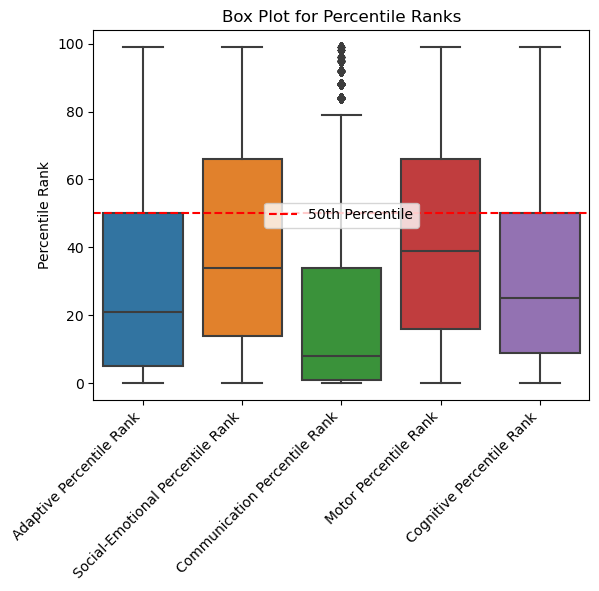

In [21]:
sns.boxplot(data=teis_domains)

# horizontal line at the 50th percentile mark
plt.axhline(y=50, color='r', linestyle='--', label='50th Percentile')
plt.title('Box Plot for Percentile Ranks')
plt.ylabel('Percentile Rank')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels at a 45-degree angle
plt.legend()


In [11]:
def convert_to_int(x):
    try:
        return int(pd.to_numeric(x, errors='coerce'))
    except (ValueError, TypeError):
        return 0

teis_subdomains = teis_subdomains.applymap(convert_to_int)
teis_subdomains

C:\Users\nelso\AppData\Local\Temp\ipykernel_10492\2785039403.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  teis_subdomains = teis_subdomains.applymap(convert_to_int)


,Adaptive-Self Care PR,Adaptive-Personal Responsibility PR,Social Emotional-Adult Interaction PR,Social Emotional-Peer Interaction PR,Social Emotional-Self Concept / Social Role PR,Communication-Receptive Communication PR,Communication-Expressive Communication PR,Motor-Gross Motor PR,Motor-Fine Motor PR,Motor-Perceptual Motor PR,Cognitive-Attention and Memory PR,Cognitive-Reasoning / Academic Skills PR,Cognitive-Perception and Concepts PR
0,16,0,91,0,95,25,37,16,37,0,16,0,84
1,16,37,75,37,63,50,37,16,84,63,37,91,16
2,25,0,63,0,9,16,16,63,75,0,25,0,16
3,84,0,50,0,63,25,25,5,75,0,91,0,50
4,5,0,9,0,5,5,5,1,25,0,37,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,84,0,84,0,75,75,75,63,95,0,37,0,95
23943,50,95,75,84,84,91,50,95,63,75,84,91,91
23944,50,63,75,50,37,2,0,63,50,63,50,37,50
23945,9,50,25,63,9,16,5,37,50,63,16,25,37


In [12]:
print(teis_subdomains.mean())
print(teis_subdomains.median())

Adaptive-Self Care PR                             27.811436
Adaptive-Personal Responsibility PR               17.035744
Social Emotional-Adult Interaction PR             54.699795
Social Emotional-Peer Interaction PR              15.907744
Social Emotional-Self Concept / Social Role PR    33.039231
Communication-Receptive Communication PR          24.882103
Communication-Expressive Communication PR         23.131333
Motor-Gross Motor PR                              37.627026
Motor-Fine Motor PR                               48.317436
Motor-Perceptual Motor PR                         20.284974
Cognitive-Attention and Memory PR                 34.799846
Cognitive-Reasoning / Academic Skills PR          16.811641
Cognitive-Perception and Concepts PR              31.006000
dtype: float64
Adaptive-Self Care PR                             16.0
Adaptive-Personal Responsibility PR                0.0
Social Emotional-Adult Interaction PR             63.0
Social Emotional-Peer Interaction PR    

C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nelso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

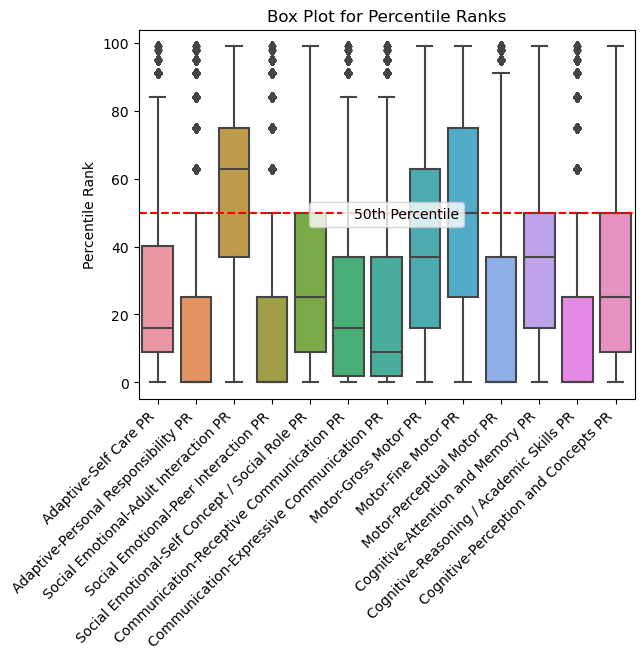

In [19]:
sns.boxplot(data=teis_subdomains)

# horizontal line at the 50th percentile mark
plt.axhline(y=50, color='r', linestyle='--', label='50th Percentile')
plt.title('Box Plot for Percentile Ranks')
plt.ylabel('Percentile Rank')
plt.xticks(rotation=45, ha='right')  
plt.legend()
